# ARIMA Work

In [14]:
import numpy as np
import pandas as pd
from pandas.tools.plotting import autocorrelation_plot
import pickle
import matplotlib.pyplot as plt
from pymongo import MongoClient
import time
import datetime
import os
import itertools
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARIMA, ARIMAResults
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.stats.diagnostic import acorr_ljungbox
from scipy import signal
import scipy.stats as scs
import warnings # We get some interger -> float typecast warning from sklean
warnings.filterwarnings('ignore')
def fromts(dt): return datetime.datetime.fromtimestamp(dt)
def tots(dt): return time.mktime(datetime.datetime.strptime(dt, "%b %d %Y").timetuple())
from plot_series_arima import fit_moving_average_trend, plot_raw, plot_moving_average, plot_resid

In [3]:
plt.style.use('ggplot')
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
with open('data/all_apps_df.pkl', 'rb') as f:
    df = pickle.load(f)

#### Make _series_ a series of AK-47 | Redline (Field-Tested) sales after 2015 with dates as the index

In [6]:
df_gun = df[(df['item_name'] == 'AK-47 | Redline (Field-Tested)')]
df_gun.date = [datetime.datetime.fromtimestamp(t) for t in df_gun.date]
df_gun.index= df_gun.date
series = df_gun.median_sell_price
series = series.loc[pd.Timestamp('2015-01-01'):]

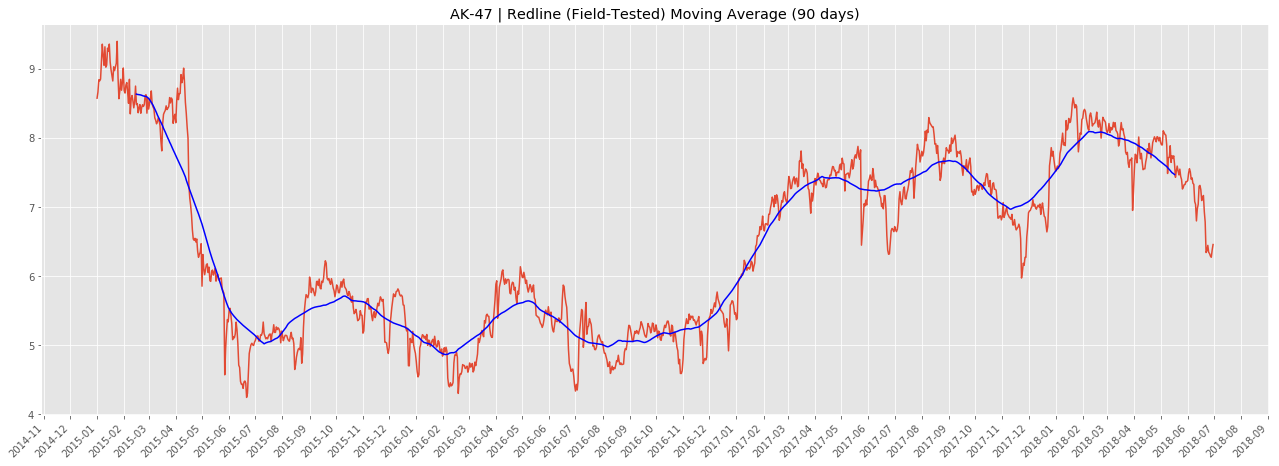

In [13]:
fig, ax = plt.subplots(figsize=(22, 8))
fig.autofmt_xdate(rotation=45)
plot_moving_average(series, ax, title='AK-47 | Redline (Field-Tested)', window=90)

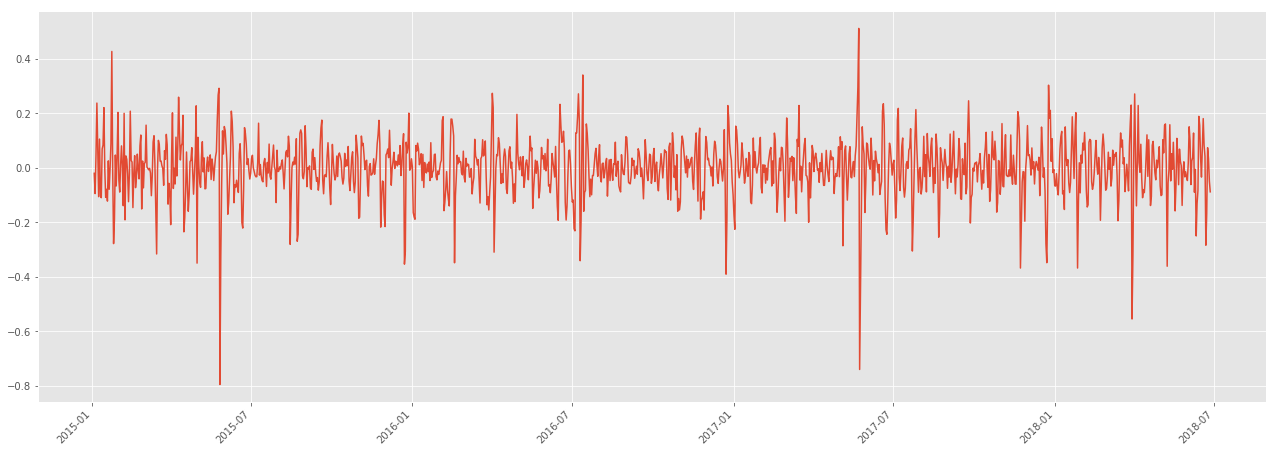

In [42]:
fig, ax = plt.subplots(figsize=(22, 8))
fig.autofmt_xdate(rotation=45)
_=ax.plot(series.index, sm.tsa.seasonal_decompose(series).resid)

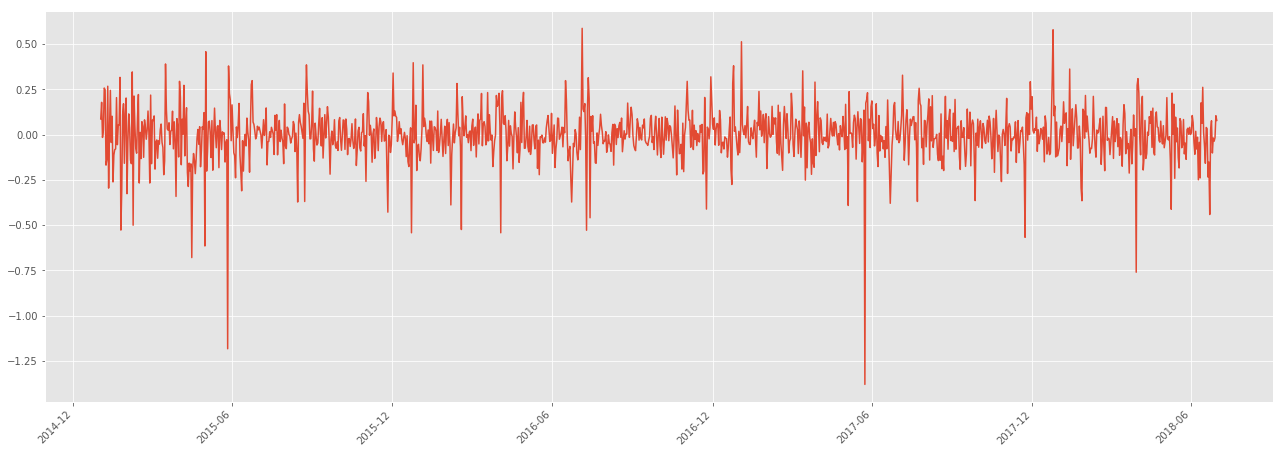

In [43]:
fig, ax = plt.subplots(figsize=(22, 8))
fig.autofmt_xdate(rotation=45)
ax.plot(series.index, series.diff())

In [54]:
sm.tsa.stattools.adfuller(series.diff()[1:-1])

(-10.646873080727838,
 4.770691603761387e-19,
 13,
 1261,
 {'1%': -3.4355464009607255,
  '5%': -2.8638347524449888,
  '10%': -2.5679917506718044},
 -1381.897779557889)

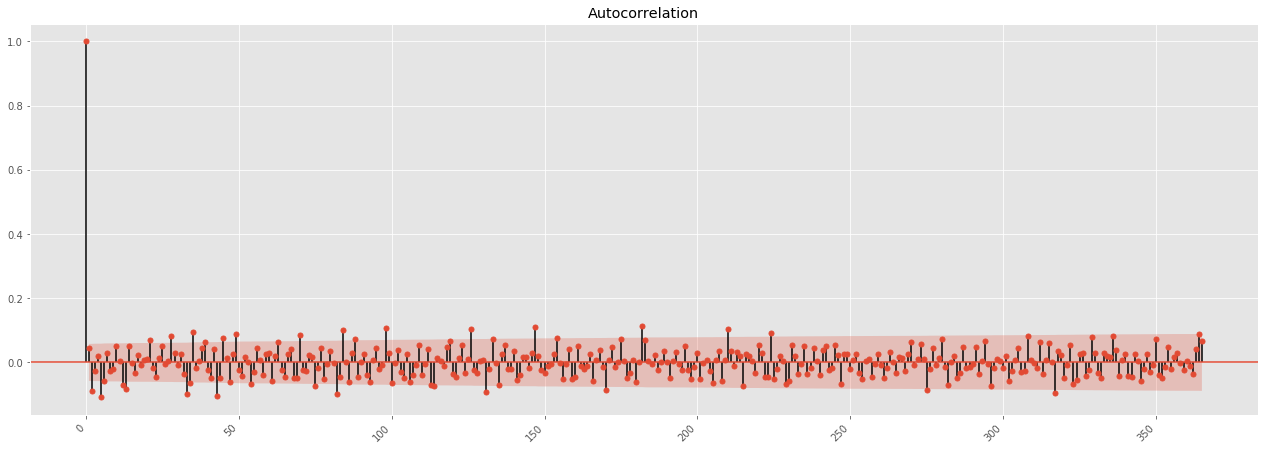

In [85]:
fig, ax = plt.subplots(figsize=(22, 8))
fig.autofmt_xdate(rotation=45)
_=sm.graphics.tsa.plot_acf(series[121:].diff()[1:], lags=365, ax=ax)

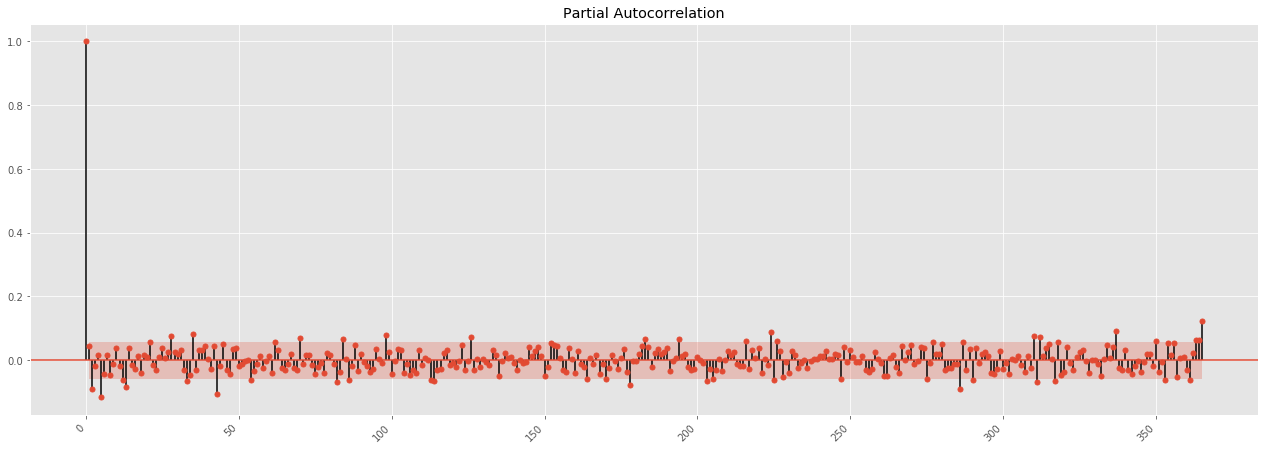

In [84]:
fig, ax = plt.subplots(figsize=(22, 8))
fig.autofmt_xdate(rotation=45)
_=sm.graphics.tsa.plot_pacf(series[121:].diff()[1:], lags=365, ax=ax)

In [87]:
model = ARIMA(series[121:], order=(3,1,0)).fit()

In [88]:
model.params

const                        0.000129
ar.L1.D.median_sell_price    0.048308
ar.L2.D.median_sell_price   -0.089633
ar.L3.D.median_sell_price   -0.018425
dtype: float64

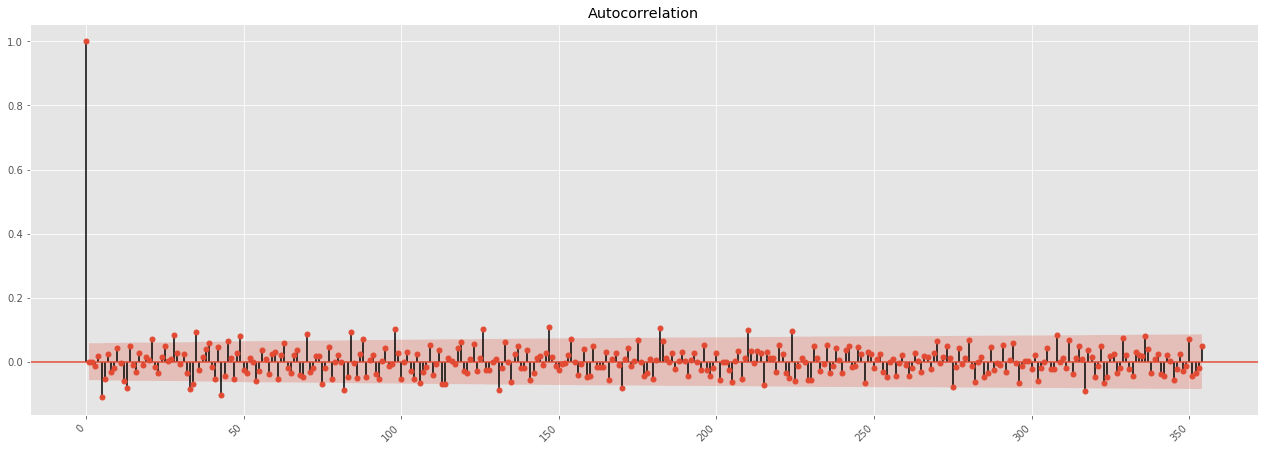

In [90]:
fig, ax = plt.subplots(figsize=(22, 8))
fig.autofmt_xdate(rotation=45)
_=sm.graphics.tsa.plot_acf(model.resid, lags=354, ax=ax)